In [239]:
#импорт используемых библиотек
from scipy.stats import ttest_ind
from itertools import combinations
from itertools import product
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype
%matplotlib inline


In [240]:
# чтение базы и оценка превичных сведений
kids = pd.read_csv('stud_math.csv')
display(kids.head(10))

kids.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [241]:
# выделить столбцы с чисто количественными признаками
cols_numeric = ['age', 'absences', 'score']


In [242]:
# удалить строки с отсутствующими значениями score, т.к. это главный целевой столбец
kids = kids.dropna(subset=['score'])

# заменить отсутствующие значения пропусков занятий частыми значениями
kids['absences'] = kids['absences'].fillna(kids['absences'].mode()[0])
kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

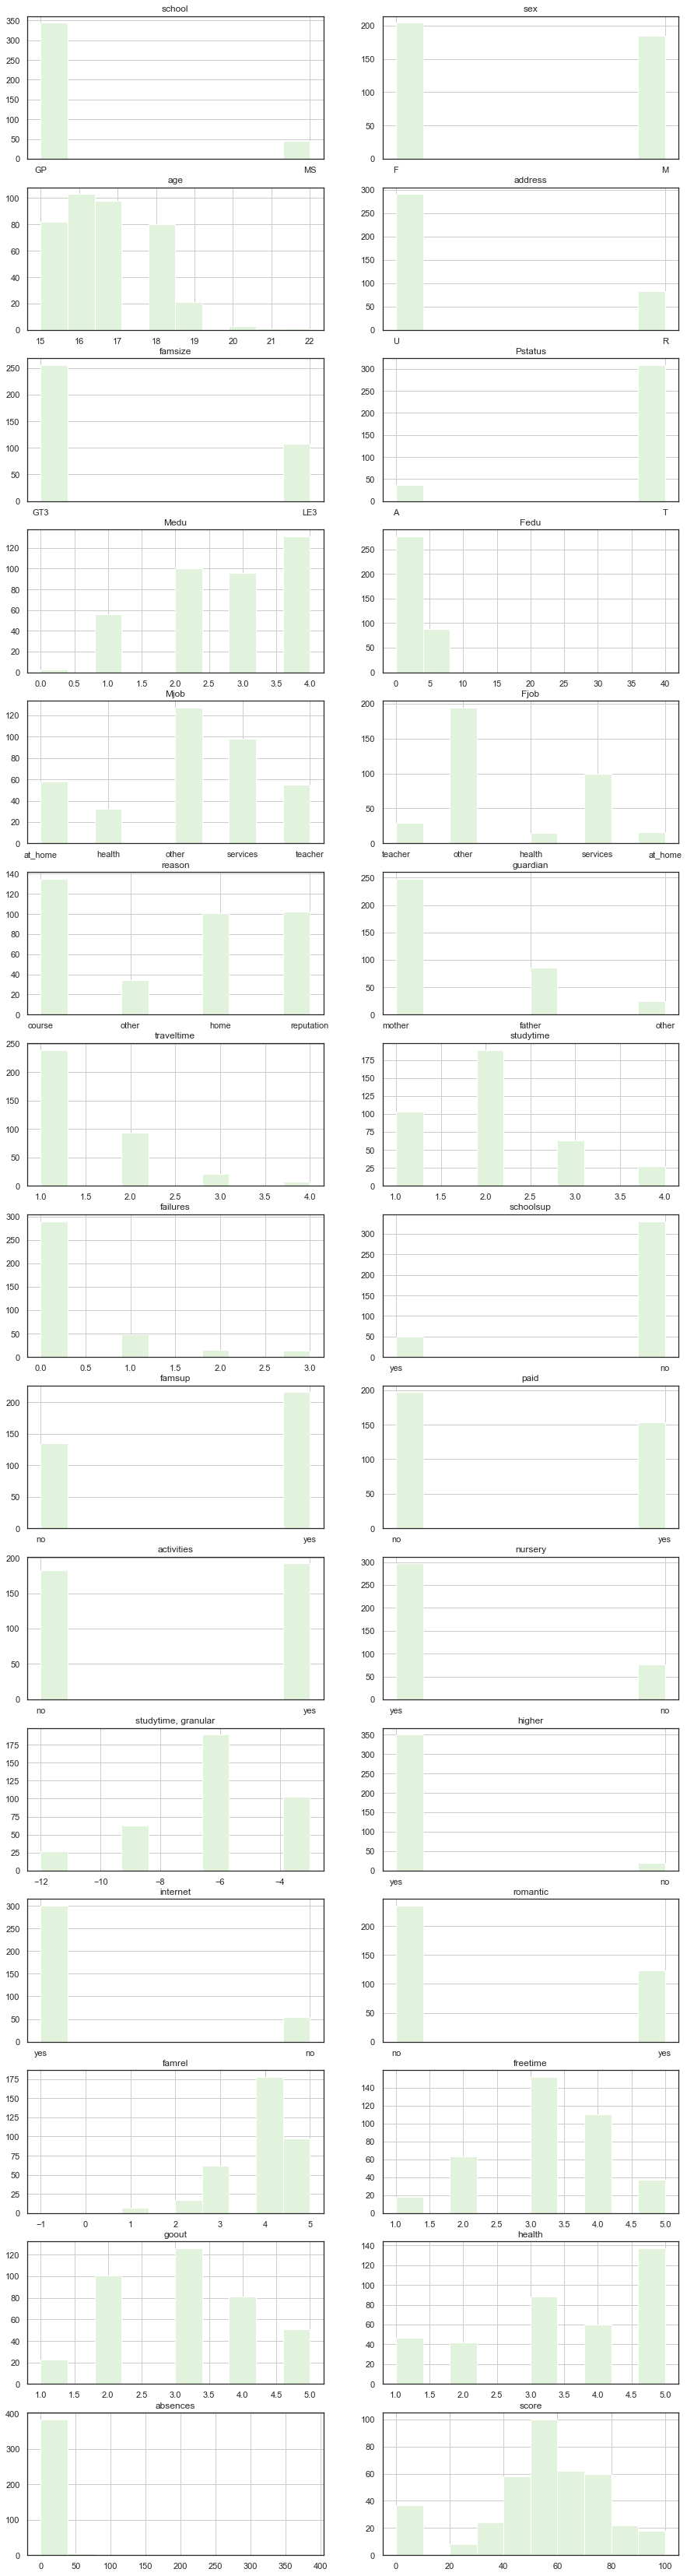

In [243]:
#функция автоматизированного графического представления всех данных по отдельности
#при необходимости настраивать разный вывод для категориальных и числовых признаков
def lookthrough(df,iscat): #оценка количества уникальных значений
    ax=[]
    #располагать диаграммы в два столбца
    if iscat:
        fig, ax = plt.subplots( round(df.shape[1]/2),2,figsize=(15,2*df.shape[1]))
    else:
        fig, ax = plt.subplots( df.shape[1],1,squeeze=False,figsize=(15,4*df.shape[1]))
    indcol=0
    for col in df.columns:
        if iscat: 
            ax[indcol//2,indcol % 2].set_title(col)
            df[col].hist(ax=ax[indcol//2,indcol % 2])
        else:
            ax[indcol,0].set_title(col)
            df[col].hist(ax=ax[indcol,0],bins=50)
            #df[col].plot(ax=ax[indcol,0])
        
        indcol=indcol+1
        
#kids=kids.sort_values(by='score')
#вывести графики для более наглядного понимания содержания базы
lookthrough(kids,True)



# lookthrough(kids.select_dtypes(exclude=CategoricalDtype),False)
# lookthrough(kids.select_dtypes(include=CategoricalDtype),True)


<AxesSubplot:>

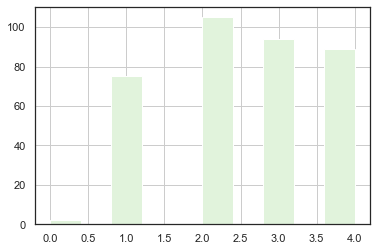

In [244]:
# возможно Fedu=40 опечатка в базе,т.к. более 4 не должно быть значений, скорее всего могло быть 4 -заменить
kids.Fedu = kids.Fedu.apply(lambda x: 4 if x == 40 else x)
kids.Fedu.hist()

<AxesSubplot:>

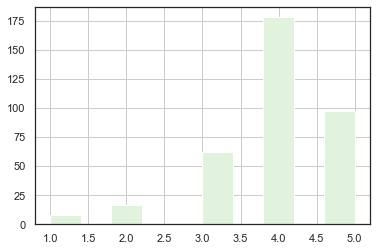

In [245]:
# возможно famrel=-1 опечатка в базе,т.к. менее 1 не должно быть значений, скорее всего могло быть 1 -заменить
kids.famrel = kids.famrel.apply(lambda x: 1 if x == -1 else x)
kids.famrel.hist()

In [246]:
#по результатам графиков похоже видно, что можно подчистить:
#пропуски занятий
kids.absences.describe()


count    389.000000
mean       7.113111
std       23.310047
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [247]:
#гигантские пропуски скорее всего ошибки в базе
display(kids[kids.absences>70])


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,...,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [248]:
# 212 и 385 пропусков занятий похоже на выбросы
# удалим эти строки, они скорее всего малополезны, т.к. пропуски занятий, очевидно, важнейший фактор в конечной успеваемости
kids = kids[kids.absences < 200]

In [249]:
kids.score.describe()

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [250]:
display(kids[kids.score == 0])
# много данных с нулевым балом (score)... возможно это ошибочные данные, удалить строки


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,...,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,...,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,...,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,...,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,...,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,...,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,...,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [251]:
# данные с нулевым балом бесполезны для работы с моделью, удалить
kids = kids[kids.score > 0]

In [252]:
#корелляционный анализ
kids.corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.119805,-0.126771,1.006847e-01,-0.011198,0.219082,0.011198,0.061178,-0.009554,0.116400,-6.008110e-02,0.207689,-0.125073
Medu,-0.119805,1.000000,0.607425,-1.687540e-01,0.070391,-0.203566,-0.070391,-0.008563,0.024449,0.078836,-3.818591e-02,0.076596,0.189611
Fedu,-0.126771,0.607425,1.000000,-1.459770e-01,-0.010801,-0.267314,0.010801,-0.012054,-0.027535,0.048275,1.973149e-02,0.017466,0.132700
traveltime,0.100685,-0.168754,-0.145977,1.000000e+00,-0.101815,0.097375,0.101815,-0.031726,-0.020219,0.027433,-9.164625e-17,0.000236,-0.074284
studytime,-0.011198,0.070391,-0.010801,-1.018153e-01,1.000000,-0.157706,-1.000000,0.057521,-0.129052,-0.030048,-8.550523e-02,-0.076117,0.142932
failures,0.219082,-0.203566,-0.267314,9.737545e-02,-0.157706,1.000000,0.157706,-0.006089,0.114818,0.119779,6.146773e-02,0.140421,-0.285775
"studytime, granular",0.011198,-0.070391,0.010801,1.018153e-01,-1.000000,0.157706,1.000000,-0.057521,0.129052,0.030048,8.550523e-02,0.076117,-0.142932
famrel,0.061178,-0.008563,-0.012054,-3.172642e-02,0.057521,-0.006089,-0.057521,1.000000,0.152812,0.029717,1.043711e-01,-0.060675,0.055476
freetime,-0.009554,0.024449,-0.027535,-2.021871e-02,-0.129052,0.114818,0.129052,0.152812,1.000000,0.294042,7.099844e-02,-0.083748,-0.007407
goout,0.116400,0.078836,0.048275,2.743342e-02,-0.030048,0.119779,0.030048,0.029717,0.294042,1.000000,-1.344627e-02,0.037209,-0.173015


In [253]:
#столбцы studytime и studytime,granular полностью обратно скореллированы, можно убрать столбец studytime,granular
reduced_kids=kids
reduced_kids.drop(['studytime, granular'], inplace = True, axis = 1) #удалить, не нужен 

In [254]:
reduced_kids = reduced_kids.where(pd.notnull(reduced_kids), None)  # замена NaN на None 
display(reduced_kids.head(10))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4,4,at_home,teacher,...,yes,yes,None,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,None,1,1,at_home,other,...,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,yes,None,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,None,...,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,yes,no,no,4,3,2,5,4,50
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,yes,no,5,4,2,5,10,75
6,GP,M,16,None,LE3,T,2,2,other,other,...,yes,yes,yes,no,4,4,4,3,0,55
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,yes,no,no,4,1,4,1,6,30
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,yes,no,None,2,2,1,0,95
9,GP,M,15,U,None,None,3,4,other,other,...,yes,yes,yes,no,5,5,1,5,0,75


In [255]:

#заменить отсутствующие значения наиболее частыми по каждому столбцу
for col in reduced_kids.columns:
    reduced_kids[col]=reduced_kids.apply(lambda x: reduced_kids[col].mode()[0] if pd.isna(x[col]) else x[col],axis=1)
sns.set(style="white", palette="Greens", color_codes=True)

#для первичного анализа влияния разных признаков на балл вывести попарные диаграммы
#составить для этого комбинации всех колонок с последней
cols = reduced_kids.columns[:len(reduced_kids.columns)-1]
combinations_all=list(product(cols, ['score']))
display(cols,combinations_all)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences'],
      dtype='object')

[('school', 'score'),
 ('sex', 'score'),
 ('age', 'score'),
 ('address', 'score'),
 ('famsize', 'score'),
 ('Pstatus', 'score'),
 ('Medu', 'score'),
 ('Fedu', 'score'),
 ('Mjob', 'score'),
 ('Fjob', 'score'),
 ('reason', 'score'),
 ('guardian', 'score'),
 ('traveltime', 'score'),
 ('studytime', 'score'),
 ('failures', 'score'),
 ('schoolsup', 'score'),
 ('famsup', 'score'),
 ('paid', 'score'),
 ('activities', 'score'),
 ('nursery', 'score'),
 ('higher', 'score'),
 ('internet', 'score'),
 ('romantic', 'score'),
 ('famrel', 'score'),
 ('freetime', 'score'),
 ('goout', 'score'),
 ('health', 'score'),
 ('absences', 'score')]

('school', 'score')


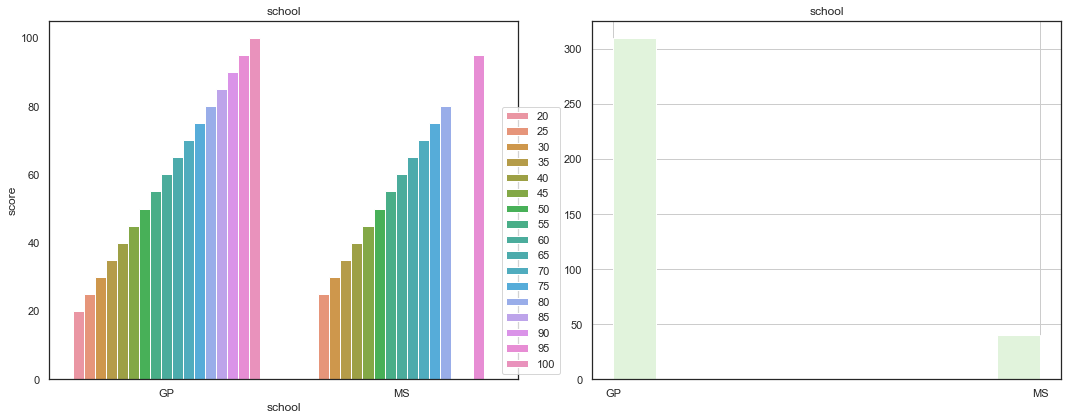

In [256]:
count = 0
lim = 2  # ограничение вывода (в тестовых целях на период настройки диаграмм)


def simple_generator(combinations_all, lim):
    count = 0
    for comb in combinations_all:
        if count > lim:
            break
        fig, ax = plt.subplots(1, 2, squeeze=False, figsize=(15, 6))
        #sns.jointplot(data=reduced_kids, x=comb[0], y=comb[1],ax=ax[count]) #
        ax[0, 0].set_title(comb[0])
        ax[0, 1].set_title(comb[0])
        axes = sns.barplot(data=reduced_kids,
                           x=comb[0], y=comb[1], hue='score', ax=ax[0, 0])
        axes.legend(loc=4, bbox_to_anchor=(0.1, 0, 1, 1))
        reduced_kids[comb[0]].hist(ax=ax[0, 1])
        count = count+1
        plt.tight_layout()
        yield comb


gen_iter = simple_generator(combinations_all, 30)
print(next(gen_iter))

# школа GP дает больший спектр баллов, но судя по правой  диаграмме - школы GP значительно больше, 
# поэтому однозначного влияния в худшую или лучшую сторону отметить нельзя

('sex', 'score')


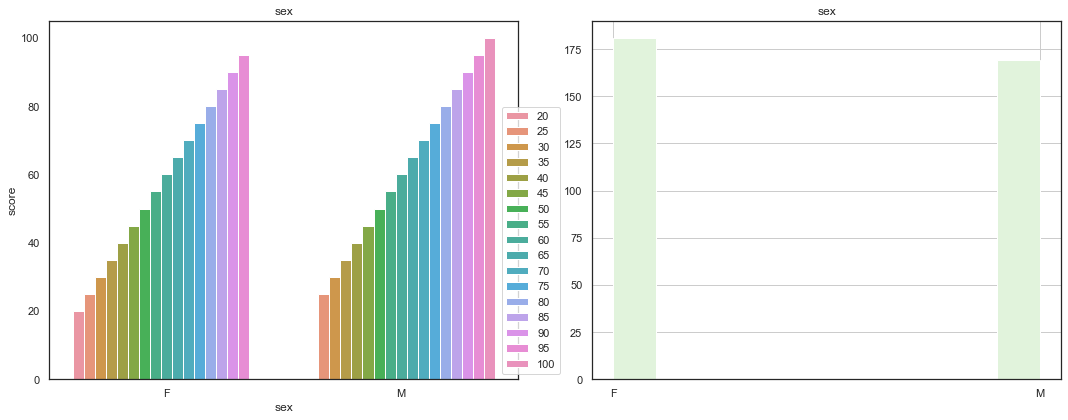

In [257]:
print(next(gen_iter))
# мужской пол в среднем похоже немного успешнее учится по математике

('age', 'score')


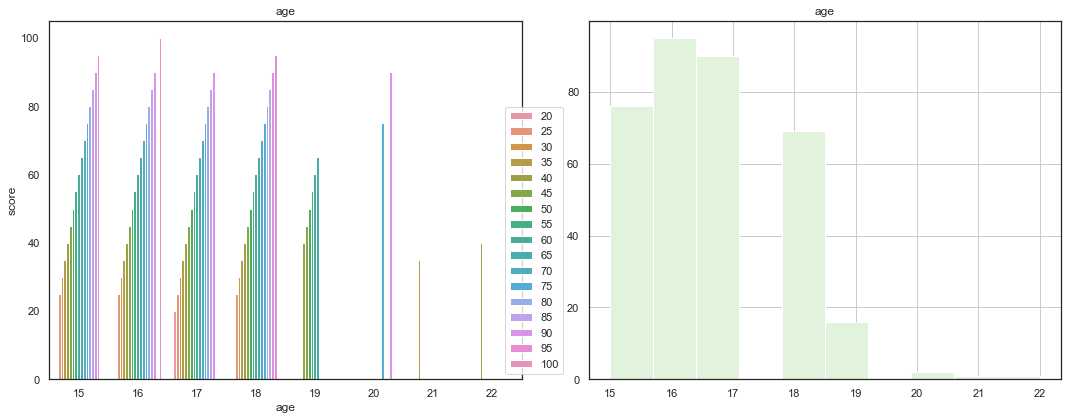

In [258]:
print(next(gen_iter))
# великовозрастные ученики 19-22 показывают худшие результаты, но их в базе значительно меньше, поэтому
# скорее всего возраст не влияет на успехи

('address', 'score')


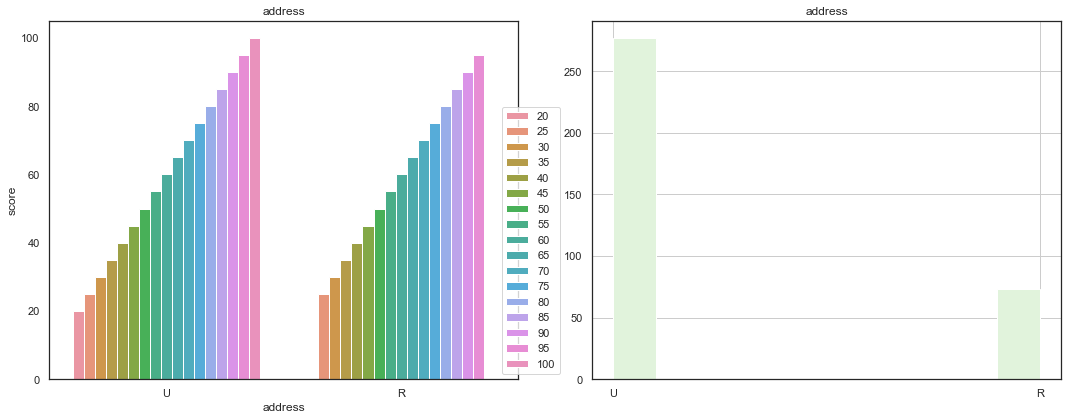

In [259]:
print(next(gen_iter))
# в городе или за городом - похоже не влияет на балы, хоть за городом результаты кучнее, но и данных по ним значительно меньше

('famsize', 'score')


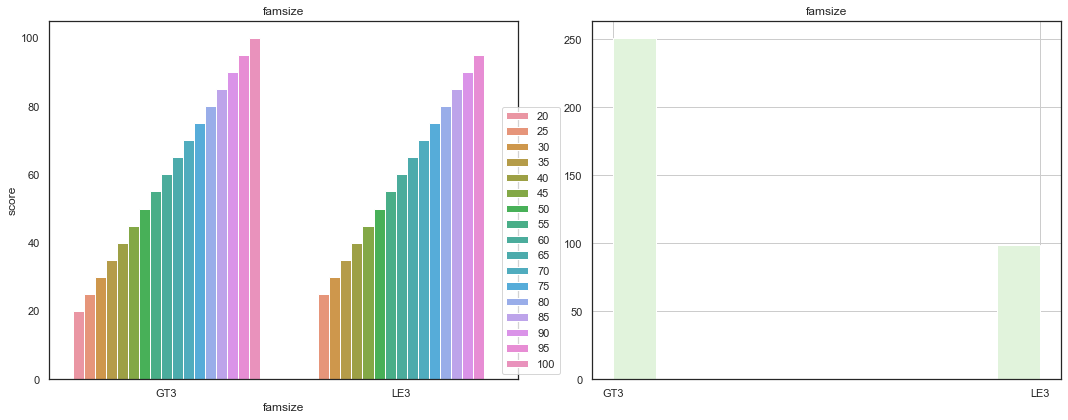

In [260]:
print(next(gen_iter))
# размер семьи - не влияет

('Pstatus', 'score')


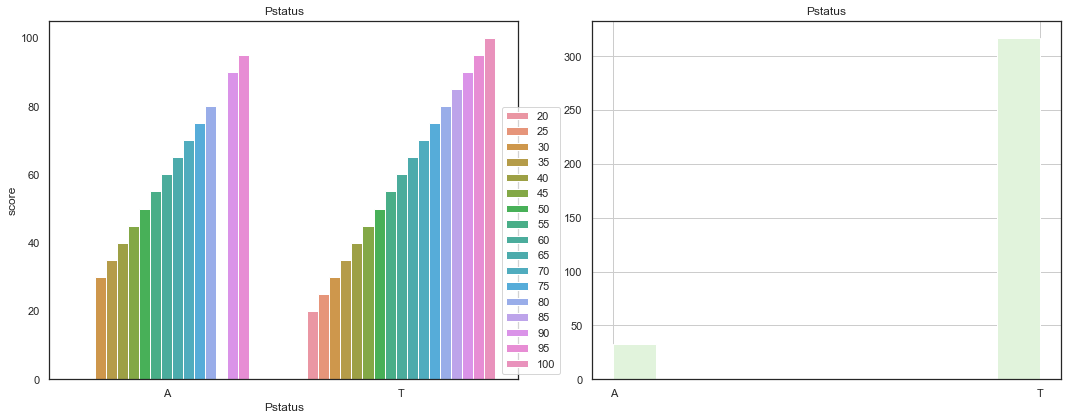

In [261]:
print(next(gen_iter))
# раздельно или совместно живут - слишком большая разница в количестве данных, поэтому нельзя сделать вывод, что влияет

('Medu', 'score')


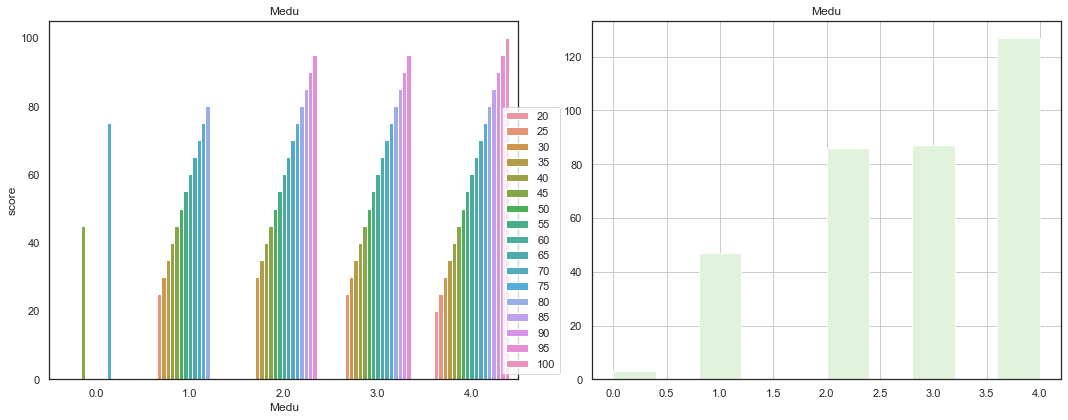

In [262]:
print(next(gen_iter))
# образование матери судя по показателям 2 и 3 влияет не нижнюю границу балла,
#разница 0,1,4 может объясняться скорее всего количеством данных
# четкой закономерности не видно

('Fedu', 'score')


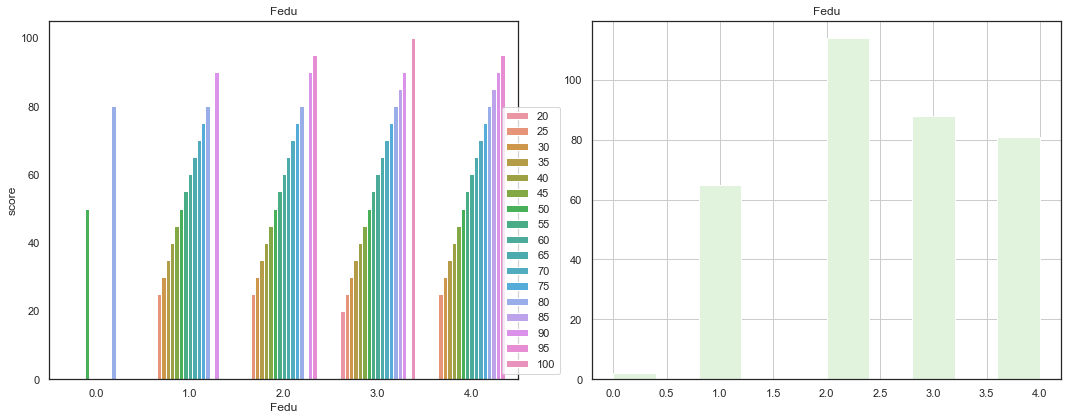

In [263]:
print(next(gen_iter))
# образование отца тоже не влияет на баллы

('Mjob', 'score')


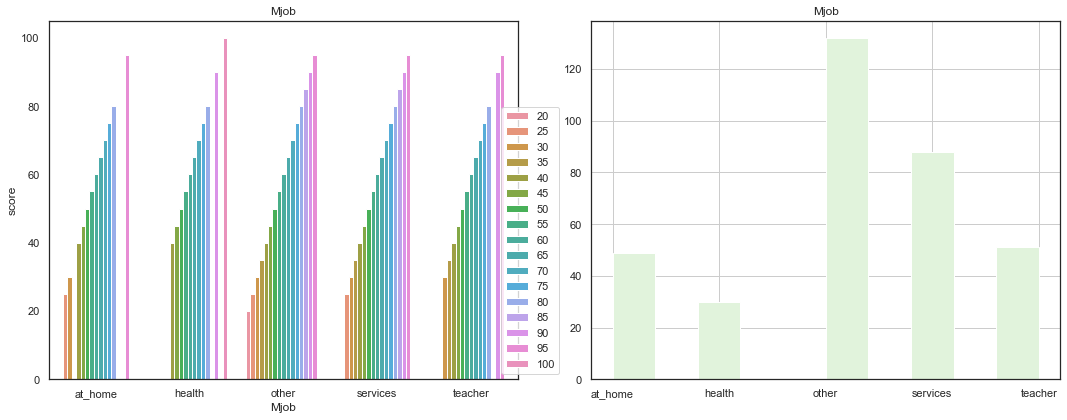

In [264]:
print(next(gen_iter))
# работа матери в сфере здравоохранения как буд-то бы оказывает влияние в лучшую сторону? но данных health сравнительно мало...может нельзя такой вывод делать

('Fjob', 'score')


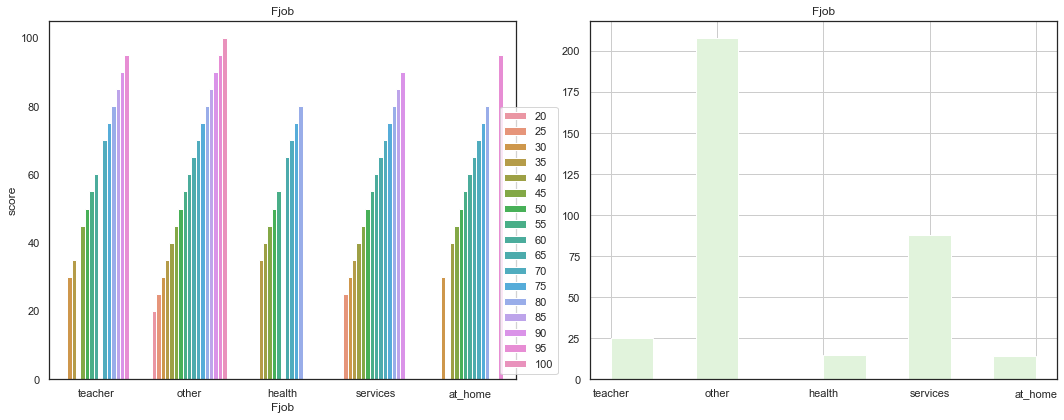

In [265]:
print(next(gen_iter))
# работа отца тоже вроде не влияет на балл

('reason', 'score')


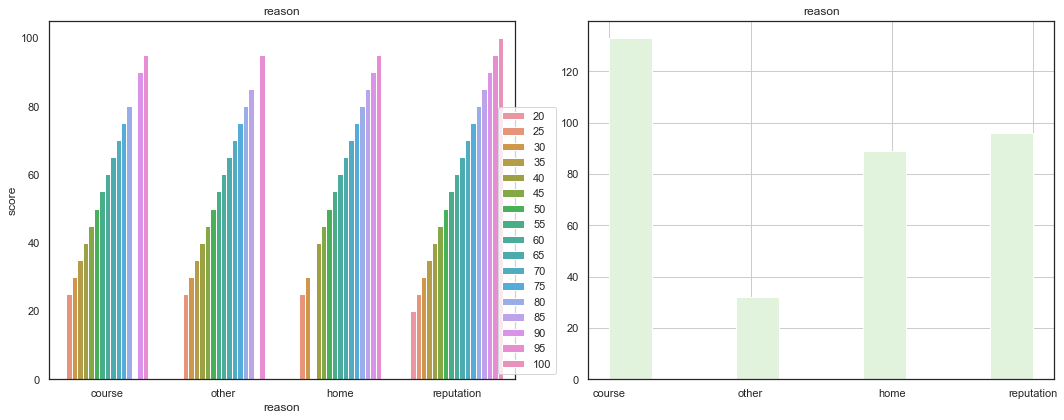

In [266]:
print(next(gen_iter))
# причина выбора школы - не оказывает влияния

('guardian', 'score')


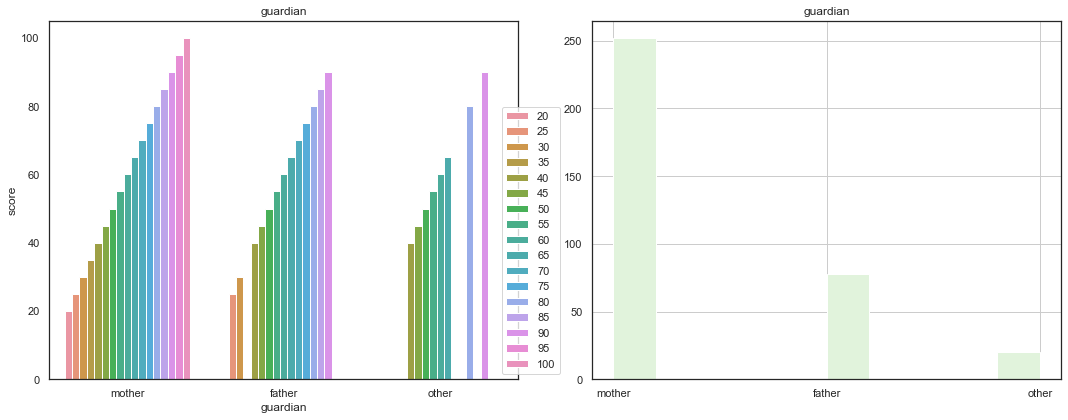

In [267]:
print(next(gen_iter))
# кто опекун - не влияет

('traveltime', 'score')


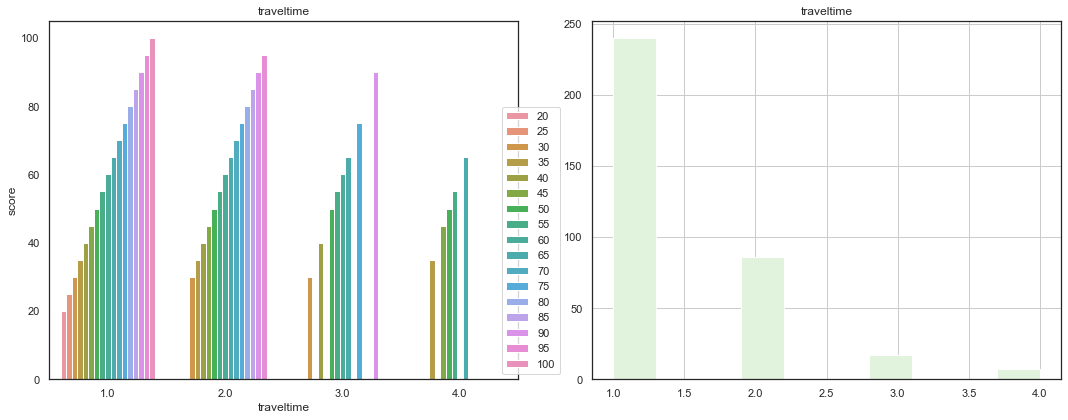

In [268]:
print(next(gen_iter))
#не влияет на балл

('studytime', 'score')


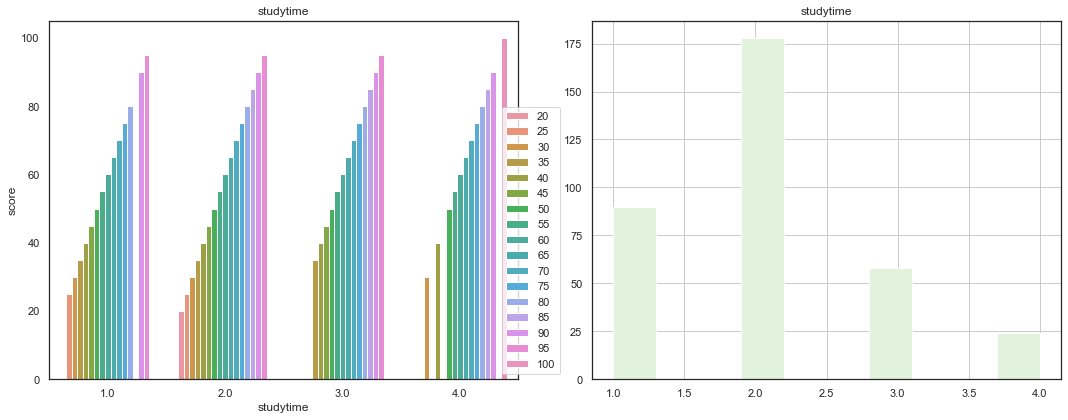

In [269]:
print(next(gen_iter))
# болшее количество времени на обучение похоже снижает вероятность низких баллов

('failures', 'score')


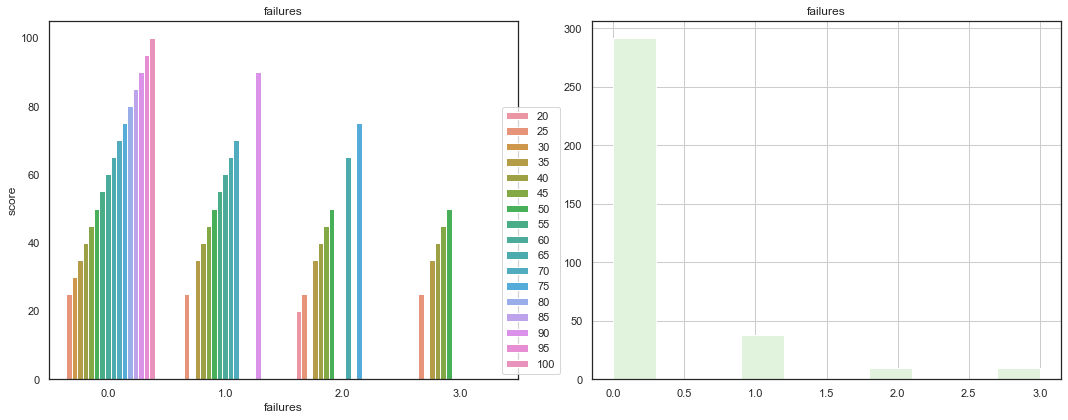

In [270]:
print(next(gen_iter))
# количество внеучебных неудач - в связи с большой разницей по выборкам -по диаграмме трудно судить о влиянии на балл
# но корелляционная таблица выше показывает самое большое влияние этого параметра на балл среди прочих
#- чем больше неудач, тем хуже балл

('schoolsup', 'score')


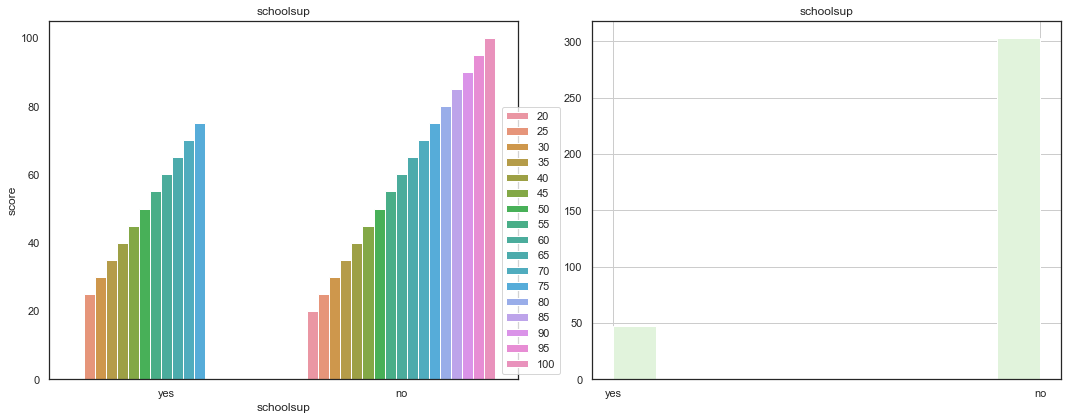

In [271]:
print(next(gen_iter))
# с учетом количества данных по наличию образовательной поддержки и отсутствию таковой - нельзя сделать выводы о влиянии на балл

('famsup', 'score')


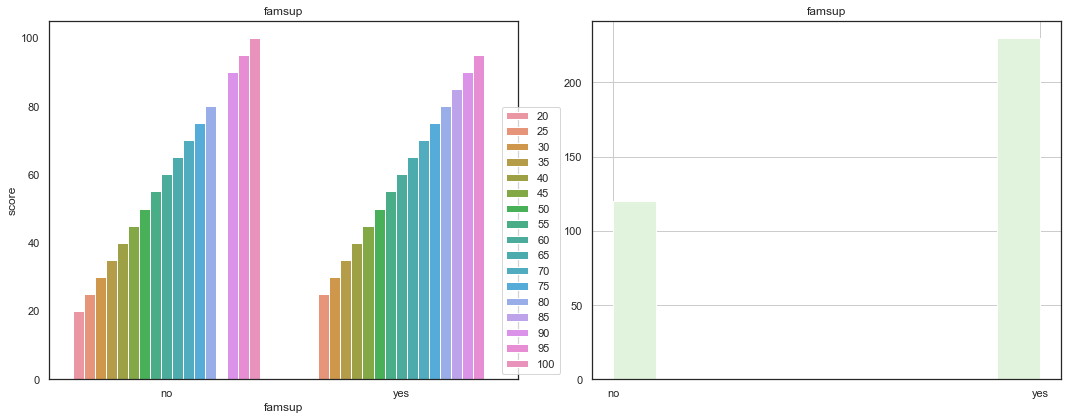

In [272]:
print(next(gen_iter))
# семейная образовательная поддержка - не влияет

('paid', 'score')


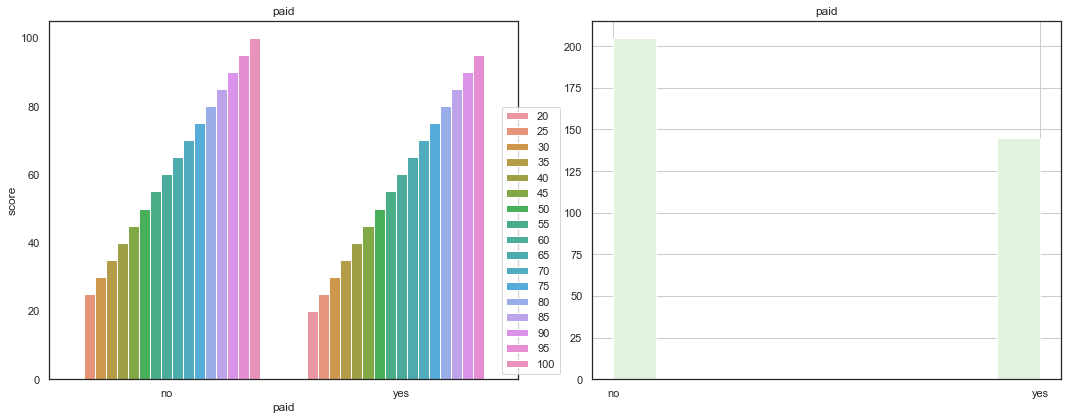

In [273]:
print(next(gen_iter))
# дополнительные платные занятия - скорее даже худшее влияние оказывают. скорее всего нет связи

('activities', 'score')


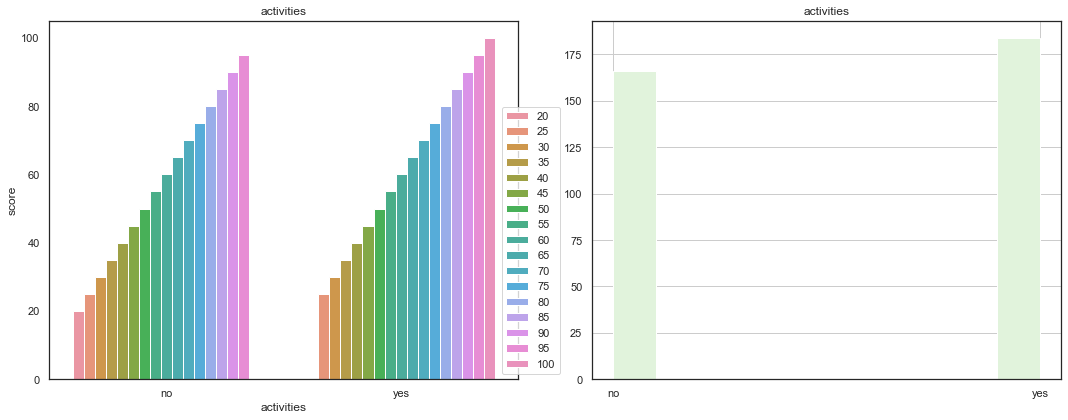

In [274]:
print(next(gen_iter))
# дополнительные внеучебные занятия очевидно влияют в лучшую сторону на балл

('nursery', 'score')


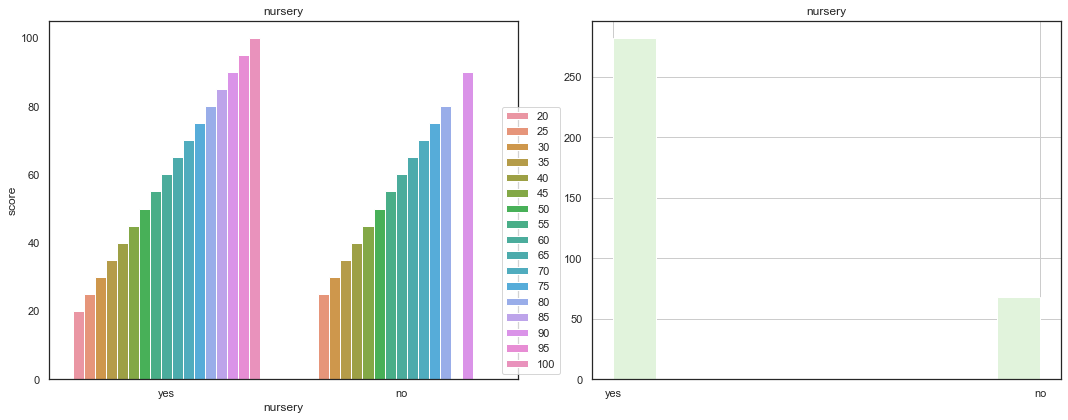

In [275]:
print(next(gen_iter))
# посещение детского сада - не видно, что влияет

('higher', 'score')


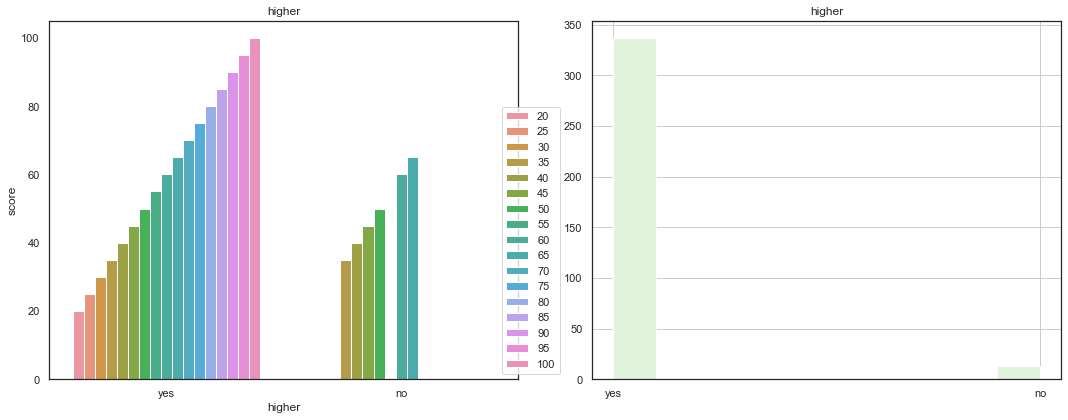

In [276]:
print(next(gen_iter))
# хочет получить высшее образование - маленькая выборка по тем, кто не хочет, чтобы делать вывод. вроде не влияет.

('internet', 'score')


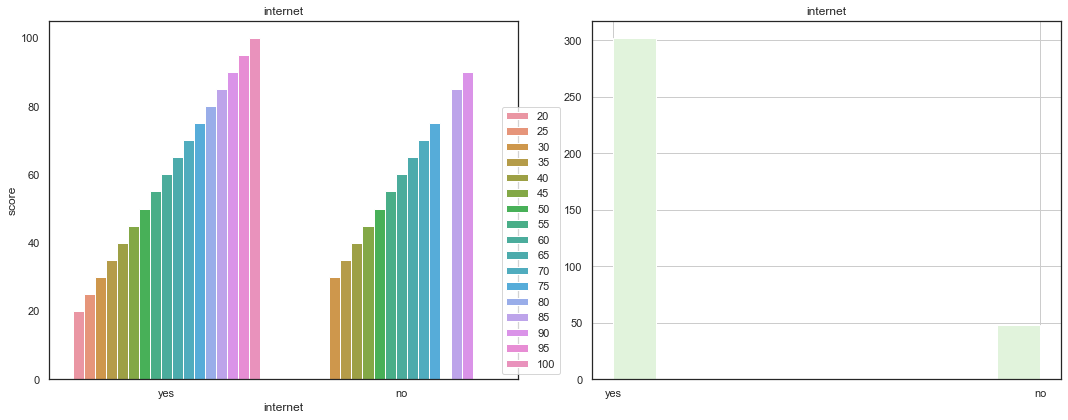

In [277]:
print(next(gen_iter))
# интернет почти у всех есть, поэтому - влияние на балл не просматривается

('romantic', 'score')


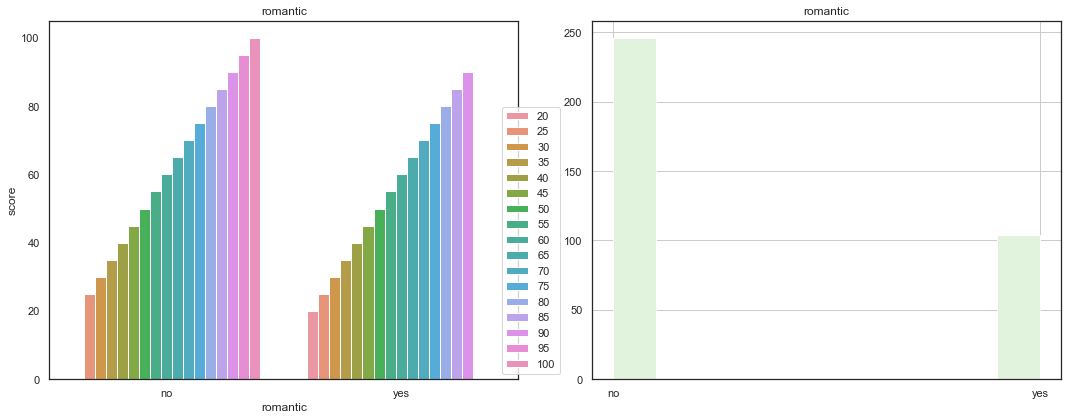

In [278]:
print(next(gen_iter))
# романтические отношения скорее ухудшают балл, хотя сильно разные выборки, чтобы однозначно сказать

('famrel', 'score')


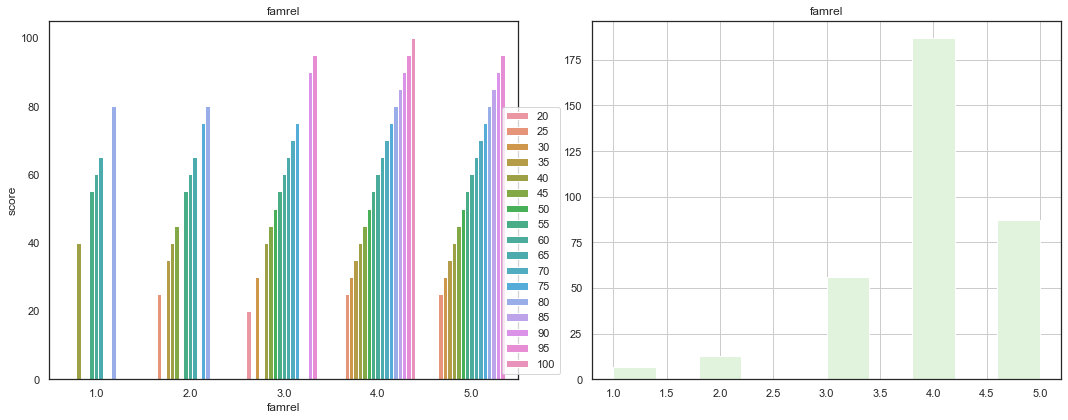

In [279]:
print(next(gen_iter))
# семейные отношения по идее должны влиять, но по диаграмме нельзя сделать такой вывод

('freetime', 'score')


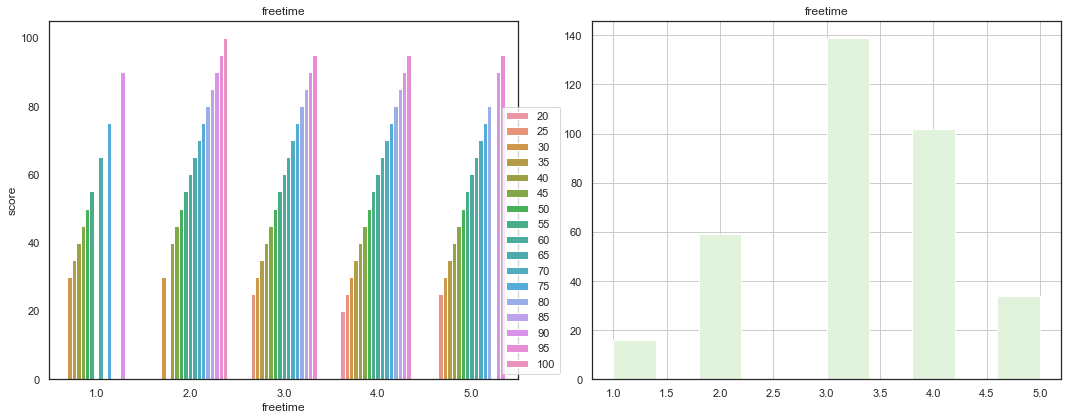

In [280]:
print(next(gen_iter))
# свободное время не влияет

('goout', 'score')


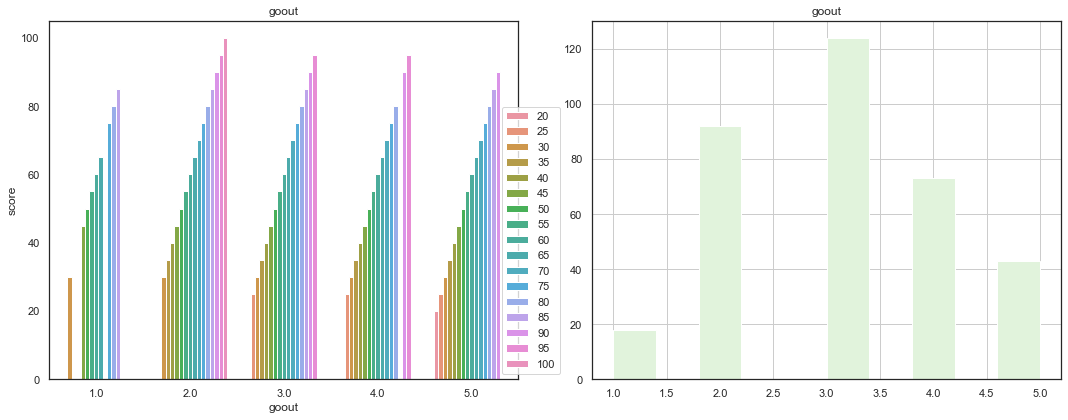

In [281]:
print(next(gen_iter))
# возможно меньшее проведенное время с друзьями улучшает балл..

('health', 'score')


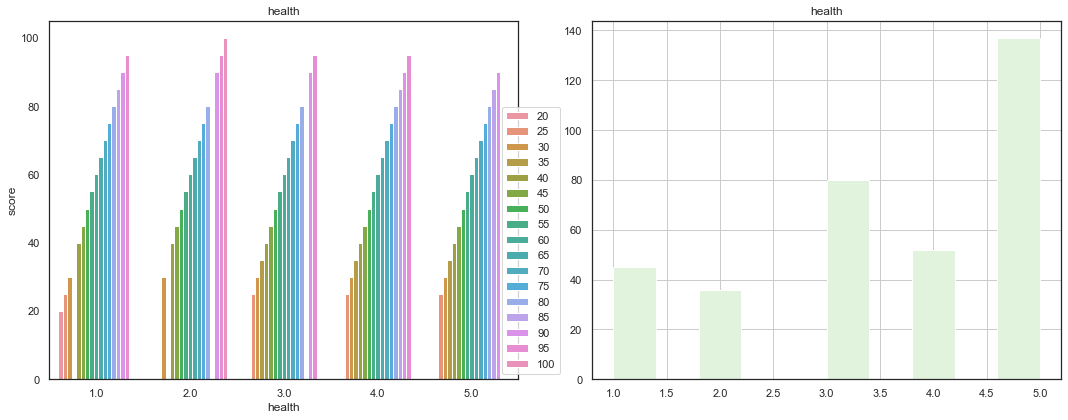

In [282]:
print(next(gen_iter))
# состояние здоровья - не видно, что влияет на балл

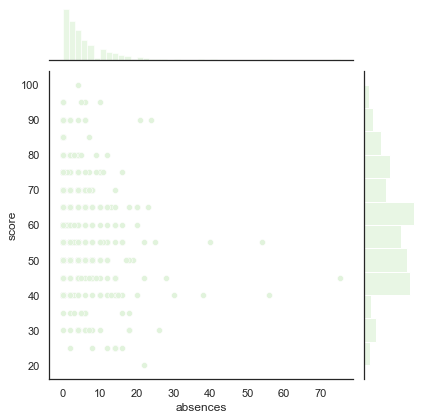

In [283]:
sns.jointplot(data=reduced_kids, x='absences', y='score')
# количество пропусков занятий похоже заметно влияет на балл, чем меньше пропусков - тем выше балл
# корелляционная таблица это подтверждает

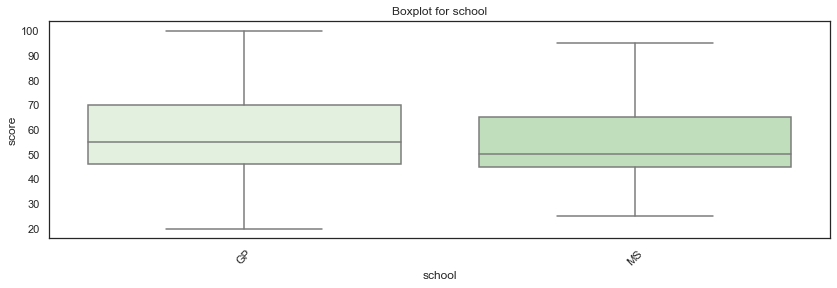

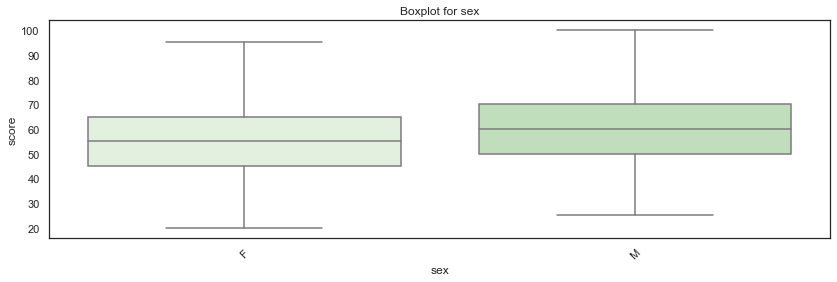

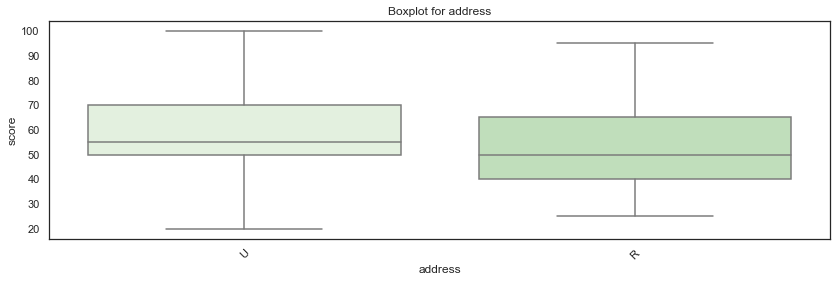

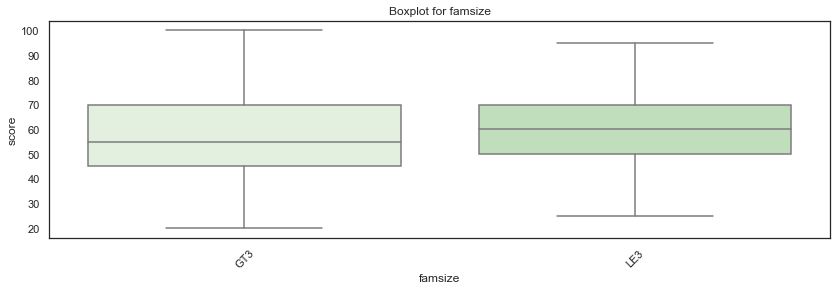

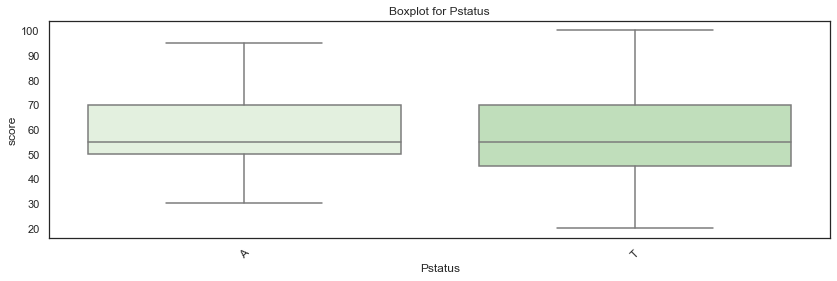

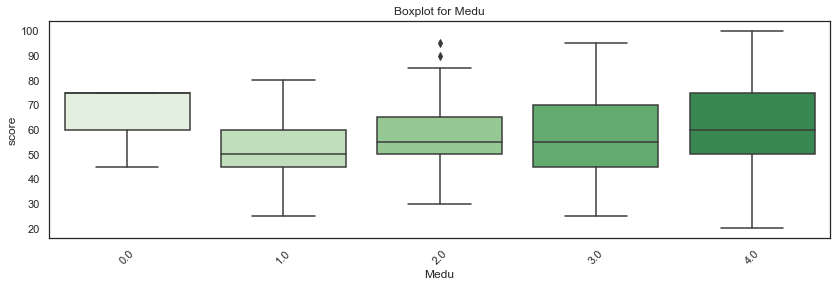

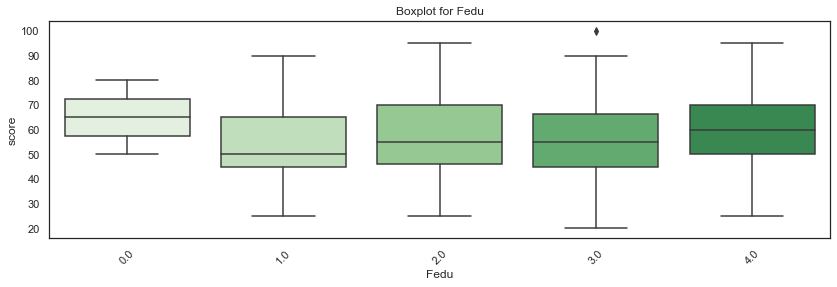

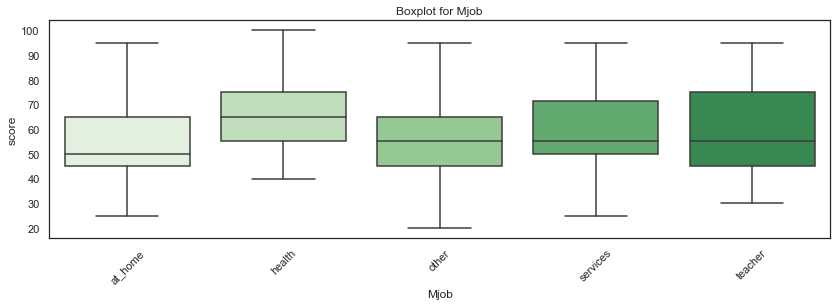

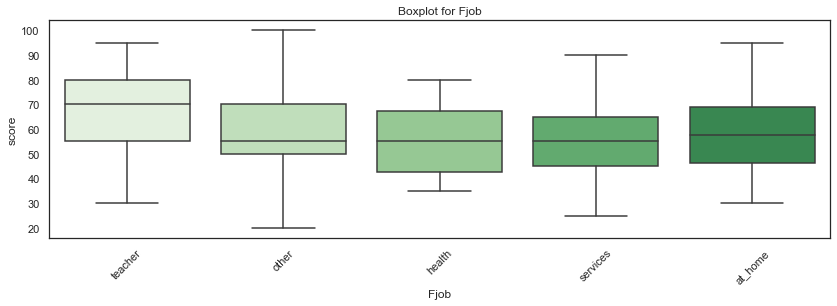

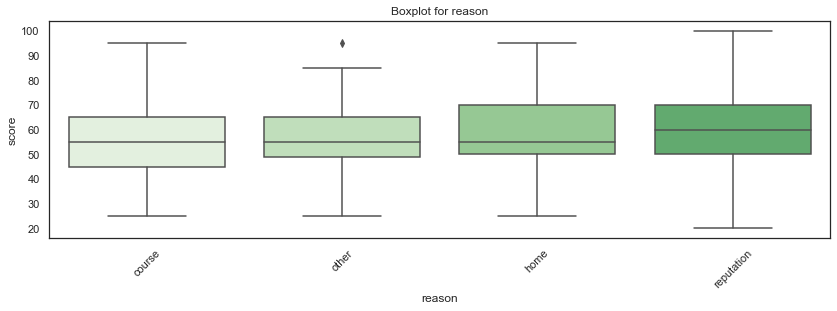

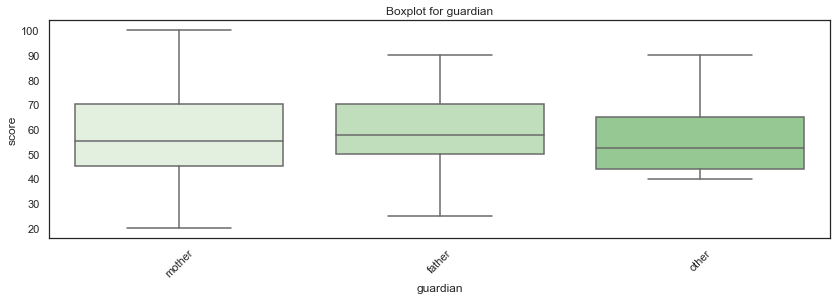

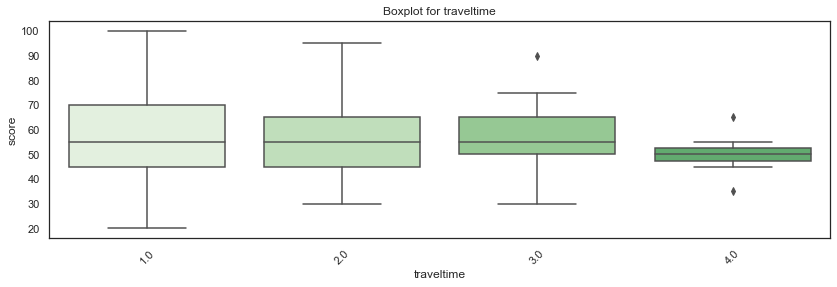

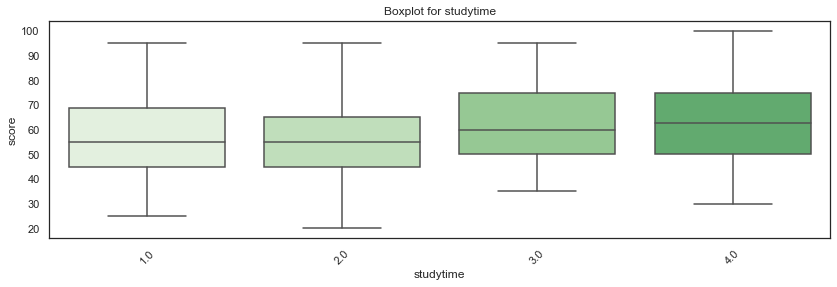

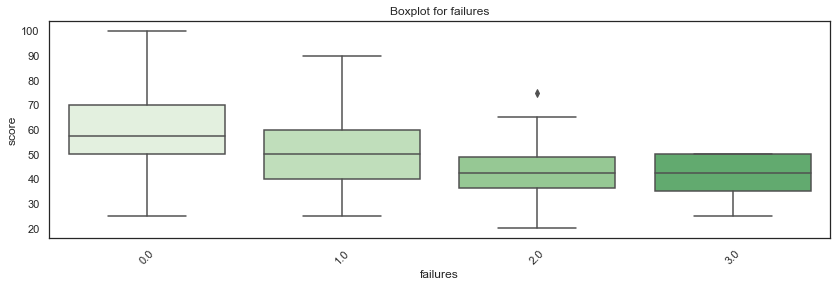

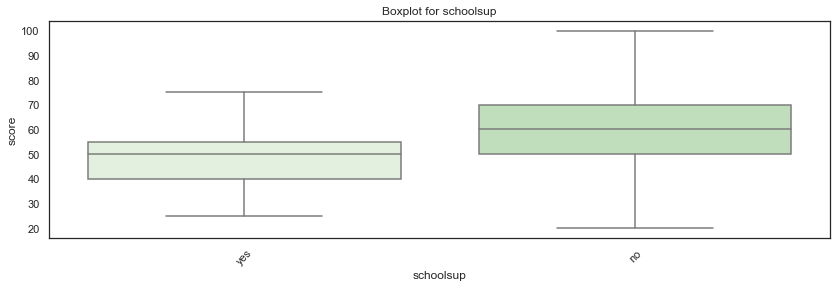

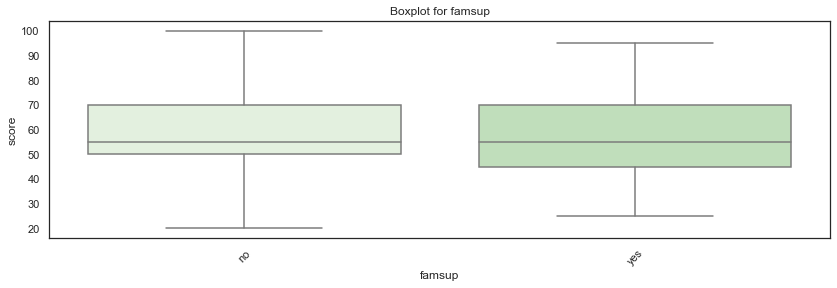

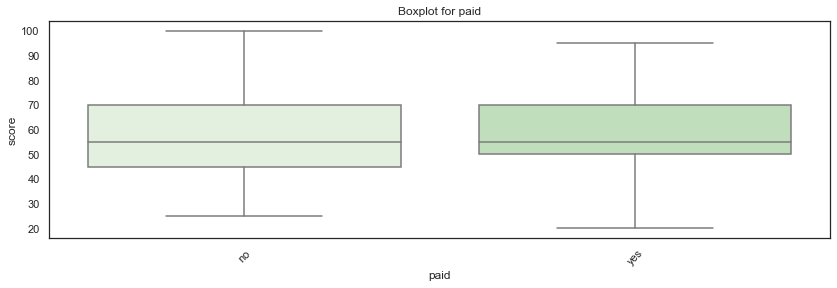

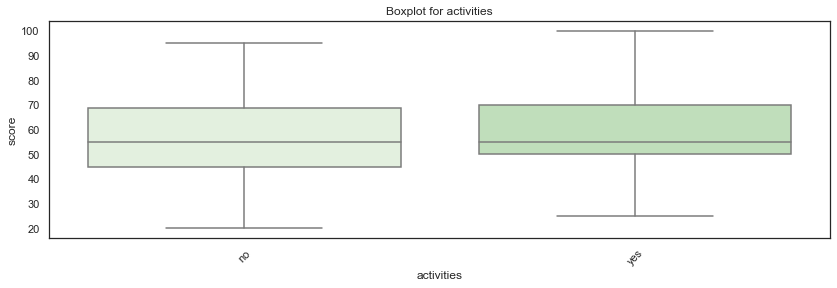

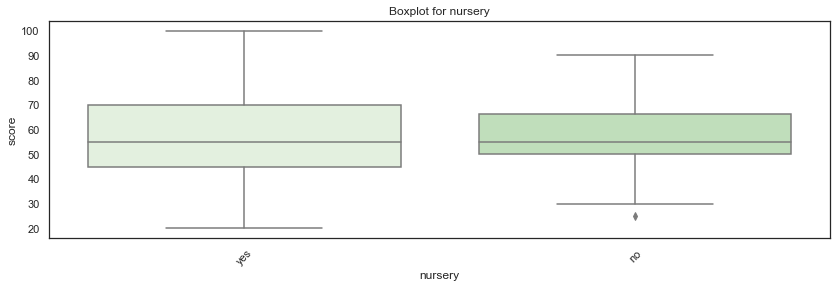

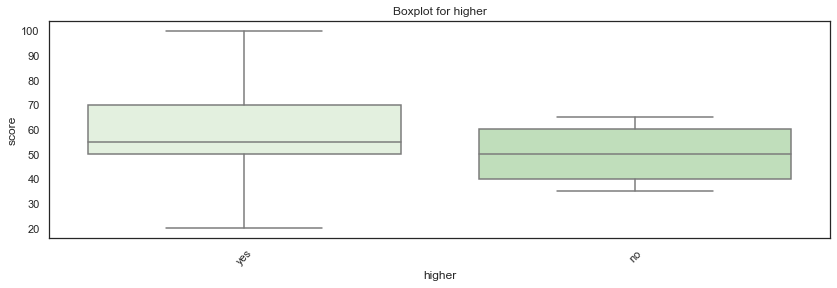

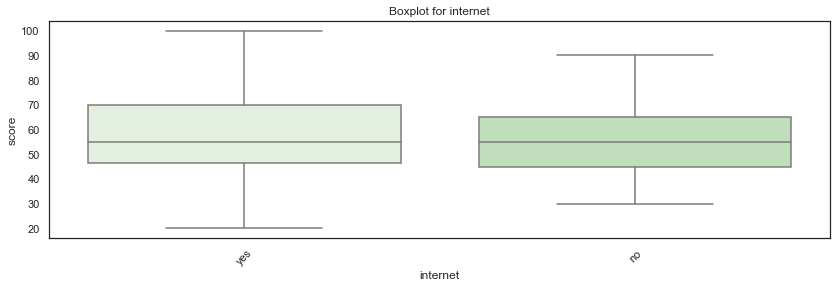

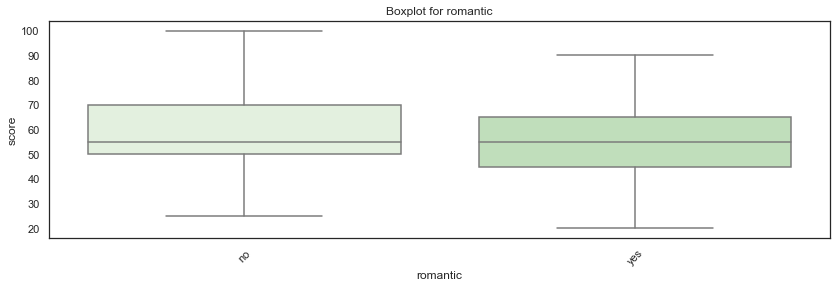

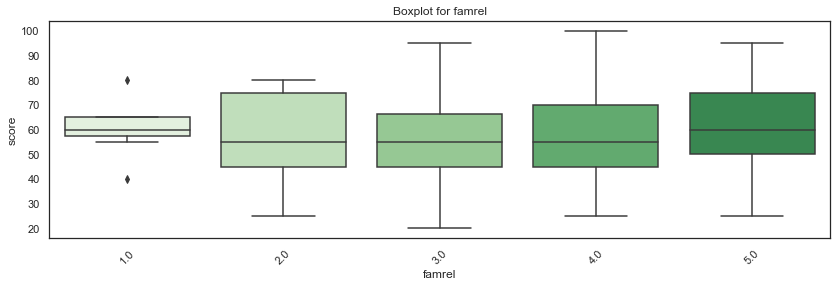

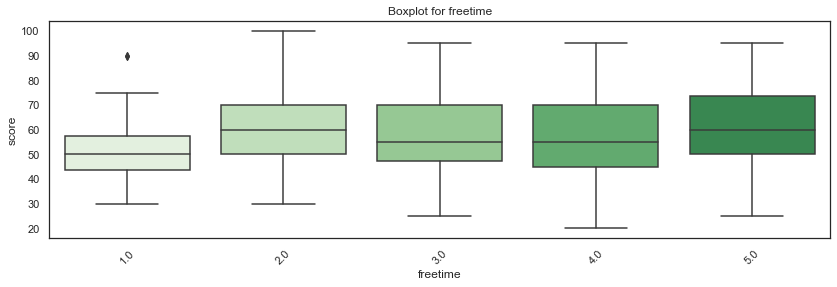

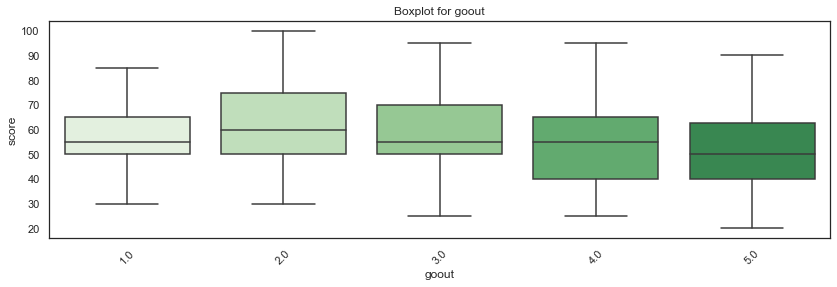

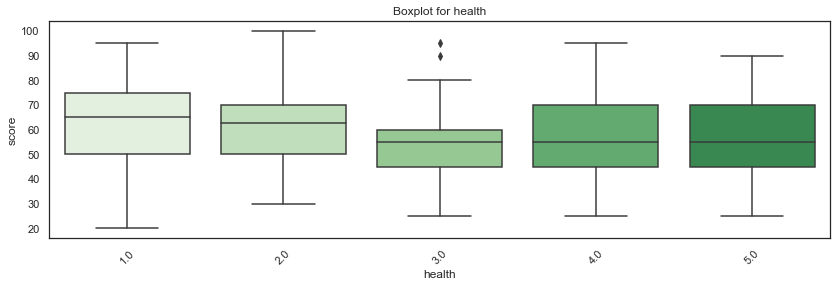

In [284]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
            data=reduced_kids #.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
            ,ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in reduced_kids.columns:
    if col not in cols_numeric:
        get_boxplot(col)

# при рассмотрении другого типа диаграмм можно несколько скорректировать предыдущие выводы о влиянии некоторых признаков,

# работа отца учителем возможно улучшает балл по математике
# большее время на учебу studytime помимо школы немного улучшает средний балл
# образование отца или матери похоже, оказывает влияние в худшую сторону для среднего образования родителей, а для особо высокого или особо низкого - улучшает балл
# количество внеучебных неудач ухудшает успехи по баллам
# дополнительная образовательная поддержка - улучшает
# желание высшего образования - улучшает
# романтические отношения очень похоже ухудшают - такой же результат просматривался в другого типа диаграммах выше
# свободное время после школы видимо влияет в худшую сторону только в случае, когда его совсем уж мало.
# проведение лишнего времени с друзьями - ухудшает балл, как и было видно на диаграммах выше ранее


In [285]:
null_data = reduced_kids.isnull().sum()
null_data[null_data > 0]
# пропусков не очень много, можно наверно без существенного искажения содержания заменить их на частые значения для некоторых столбцов

Series([], dtype: int64)

In [286]:
for col in reduced_kids.columns:
    reduced_kids[col]=reduced_kids.apply(lambda x: reduced_kids[col].mode()[0] if pd.isna(x[col]) else x[col],axis=1)


In [287]:
# для исключения ненужных столбцов (не влияющих на предсказание итоговой оценки score)
# в дополнение к анализу диаграмм выполняется
# статистический анализ номинативных признаков с помощью теста Стьюдента.
def get_stat_dif(column):
    print('\nпроверка: ', column, end=' ')
    cols = reduced_kids.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(reduced_kids.loc[reduced_kids.loc[:, column] == comb[0], 'score'],
                     reduced_kids.loc[reduced_kids.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


count = 0
for col in reduced_kids.columns:
    if col not in cols_numeric:
        count = count+1
        get_stat_dif(col)


проверка:  school 
проверка:  sex Найдены статистически значимые различия для колонки sex

проверка:  address Найдены статистически значимые различия для колонки address

проверка:  famsize 
проверка:  Pstatus 
проверка:  Medu Найдены статистически значимые различия для колонки Medu

проверка:  Fedu Найдены статистически значимые различия для колонки Fedu

проверка:  Mjob Найдены статистически значимые различия для колонки Mjob

проверка:  Fjob 
проверка:  reason 
проверка:  guardian 
проверка:  traveltime 
проверка:  studytime Найдены статистически значимые различия для колонки studytime

проверка:  failures Найдены статистически значимые различия для колонки failures

проверка:  schoolsup Найдены статистически значимые различия для колонки schoolsup

проверка:  famsup 
проверка:  paid 
проверка:  activities 
проверка:  nursery 
проверка:  higher 
проверка:  internet 
проверка:  romantic 
проверка:  famrel 
проверка:  freetime 
проверка:  goout Найдены статистически значимые различия

In [288]:
# таким образом, по результату всего проведенного анализа можно удалить столбцы
colstodrop=['school','famsize','Pstatus','reason','guardian','traveltime','famsup','paid','activities','nursery','internet','health']
reduced_kids.drop(colstodrop, inplace = True, axis = 1) #удалить, не нужны для модели предсказания баллов
# Fjob, romantic и famrel не показалось нужным выкинуть, так же и freetime под вопросом- поэтому пока оставил в базе
reduced_kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        350 non-null    object 
 1   age        350 non-null    int64  
 2   address    350 non-null    object 
 3   Medu       350 non-null    float64
 4   Fedu       350 non-null    float64
 5   Mjob       350 non-null    object 
 6   Fjob       350 non-null    object 
 7   studytime  350 non-null    float64
 8   failures   350 non-null    float64
 9   schoolsup  350 non-null    object 
 10  higher     350 non-null    object 
 11  romantic   350 non-null    object 
 12  famrel     350 non-null    float64
 13  freetime   350 non-null    float64
 14  goout      350 non-null    float64
 15  absences   350 non-null    int64  
 16  score      350 non-null    int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 59.2+ KB


In [289]:
# оценить количество уникальных значений по каждому столбцу
def unique_counts(df):
    return pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                     columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])


unique_counts = unique_counts(reduced_kids)
display(unique_counts)
# вариаций мало, (от 2 до 5) можно заменить категориальными типами для сокращения объема базы

,Column_Name,Num_Unique
0,sex,2
11,romantic,2
2,address,2
10,higher,2
9,schoolsup,2
7,studytime,4
8,failures,4
5,Mjob,5
4,Fedu,5
3,Medu,5


In [290]:
# для компактности базы преобразование типов в категориальные и целочисленные
t = pd.CategoricalDtype(ordered=True) #создание категориального типа

for col in reduced_kids.columns:
    if col not in cols_numeric:
        reduced_kids[col] = reduced_kids[col].astype(t)
for col in reduced_kids.columns:
    if col in cols_numeric:
        # дробных значений в базе не наблюдается, можно заменить на целые для однообразия и сокращения объема
        reduced_kids[col] = reduced_kids[col].astype('Int64')

reduced_kids.info()
display(reduced_kids.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        350 non-null    category
 1   age        350 non-null    Int64   
 2   address    350 non-null    category
 3   Medu       350 non-null    category
 4   Fedu       350 non-null    category
 5   Mjob       350 non-null    category
 6   Fjob       350 non-null    category
 7   studytime  350 non-null    category
 8   failures   350 non-null    category
 9   schoolsup  350 non-null    category
 10  higher     350 non-null    category
 11  romantic   350 non-null    category
 12  famrel     350 non-null    category
 13  freetime   350 non-null    category
 14  goout      350 non-null    category
 15  absences   350 non-null    Int64   
 16  score      350 non-null    Int64   
dtypes: Int64(3), category(14)
memory usage: 29.0 KB


,sex,age,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,romantic,famrel,freetime,goout,absences,score
0,F,18,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,no,4.0,3.0,4.0,6,30
1,F,17,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,no,5.0,3.0,3.0,4,30
2,F,15,U,1.0,1.0,at_home,other,2.0,3.0,yes,yes,no,4.0,3.0,2.0,10,50
3,F,15,U,4.0,2.0,health,other,3.0,0.0,no,yes,yes,3.0,2.0,2.0,2,75
4,F,16,U,3.0,3.0,other,other,2.0,0.0,no,yes,no,4.0,3.0,2.0,4,50
5,M,16,U,4.0,3.0,services,other,2.0,0.0,no,yes,no,5.0,4.0,2.0,10,75
6,M,16,U,2.0,2.0,other,other,2.0,0.0,no,yes,no,4.0,4.0,4.0,0,55
7,F,17,U,4.0,4.0,other,teacher,2.0,0.0,yes,yes,no,4.0,1.0,4.0,6,30
8,M,15,U,3.0,2.0,services,other,2.0,0.0,no,yes,no,4.0,2.0,2.0,0,95
9,M,15,U,3.0,4.0,other,other,2.0,0.0,no,yes,no,5.0,5.0,1.0,0,75
